# Проектная работа - анализ продаж компьютерных игр

## Описание проекта

Нам  доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Наша задача -  выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Наша задача - отборать важные характеристики продукта, которые позволят добиться успешных продаж в 2017 году



## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
!pip install phik
import phik
from scipy import stats as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.1 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/XRbFuiBNI_E-HA')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.duplicated().sum()

0

In [5]:
df[df[['Name', 'Platform']].duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [6]:
def lookup(df:pd.DataFrame) -> None:
    '''Функция для получения базовой информации о датафрейме'''
    print('Dataset shape',df.shape,"example:")
    display(df.dropna().sample())
    display(df.info())
    for col in df.columns:
        n = df[col].nunique()
        if n < 15:
            display(df[col].value_counts(dropna=False).to_frame().T)
        elif np.issubdtype(df[col].dtype, np.number):
            print(f"{col} — {n} values. Min {df[col].min()}, max: {df[col].max()}, пропусков в колонке - {df[col].isna().sum()}")
        else:
            print(f"{col} — {n} values. Min {df[col].dropna().min()}, max: {df[col].dropna().max()}, пропсуков в колонке - {df[col].isna().sum()}")

In [7]:
                                                  lookup(df)

Dataset shape (16715, 11) example:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
856,Tenchu: Stealth Assassins,PS,1997.0,Action,0.95,0.64,0.27,0.13,87.0,8.8,M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name — 11559 values. Min  Beyblade Burst, max: ¡Shin Chan Flipa en colores!, пропсуков в колонке - 2
Platform — 31 values. Min 2600, max: XOne, пропсуков в колонке - 0
Year_of_Release — 37 values. Min 1980.0, max: 2016.0, пропусков в колонке - 269


,Action,Sports,Misc,Role-Playing,Shooter,Adventure,Racing,Platform,Simulation,Fighting,Strategy,Puzzle,NaN
Genre,3369,2348,1750,1498,1323,1303,1249,888,873,849,683,580,2


NA_sales — 402 values. Min 0.0, max: 41.36, пропусков в колонке - 0
EU_sales — 307 values. Min 0.0, max: 28.96, пропусков в колонке - 0
JP_sales — 244 values. Min 0.0, max: 10.22, пропусков в колонке - 0
Other_sales — 155 values. Min 0.0, max: 10.57, пропусков в колонке - 0
Critic_Score — 82 values. Min 13.0, max: 98.0, пропусков в колонке - 8578
User_Score — 96 values. Min 0, max: tbd, пропсуков в колонке - 6701


,NaN,E,T,M,E10+,EC,K-A,RP,AO
Rating,6766,3990,2961,1563,1420,8,3,3,1


### Наблюдения

Перед нами данные о продажах игр за период с 1980 по 2016 год
Есть данные о продажах в трех регионах - Северная Америка, Европа и Япония, а также дополнительные данные о продажах в других регионах, названия которых мы не знаем



Мы также располагаем данными о платформах, жанрах, пользовательском рейтинге, оценке игры критиками, а также рейтинг игры ассоциации ESRB



Расшифровка значений рейтинга ESRB:



EC	Для детей младшего возраста. 3+



E	Подходит для всех возрастных категорий.



K-A - заменена в 1998 году рейтингом E.



E 10+	Подходит для лиц старше 10 лет.



T	Подходит для лиц старше 13 лет.



M	Подходит для лиц старше 17 лет.



AO	Подходит для взрослых старше 18 лет.



RP	Категория ещё не присвоена.



Важно учитывать, что рейтинг пользователей по 10-бальной шкале, а рейтинг критиков - по 100 бальной





В большинстве случаев (за исключением 5 случаев) каждая запись в таблице соответствует уникальной комбинации из названия игры и платформы. Таким образом мы делаем предположение, что цифры в таблице с продажами говорят о суммарных продажах каждой игры за все годы, начиная с года выпуска.

## Предобработка данных

In [8]:
df.columns = df.columns.str.lower()


In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)

In [10]:
df['user_score'] = df['user_score'].astype('float')

In [60]:
df = df.dropna(subset = 'name')

In [61]:
df['total_sales'] = df['eu_sales']+df['na_sales']+df['jp_sales']+df['other_sales']
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5484,Hell's Kitchen: The Game,Wii,2008.0,Simulation,0.3,0.0,0.0,0.03,NaN,NaN,NaN,0.33


### Результаты предобработки данных
1) Мы перевели названия колонок в нижний регистр


2) Мы удалили две строки с пропущенным названием игры



3) Мы приняли решение не удалять пропуски в других колонках, так как не хотели терять ценную информацию.



4) Значение 'tbd' в колонке с рейтингом пользователей мы поменяли на Nan и это нам позволило перевести значения колонки к типу float


5) Мы добавили новую колонку 'total_sales' в которой хранится сумма всех продаж

## Исследовательский анализ данных

Для начала посмотрим, есть ли корреляция между значениями в колонках

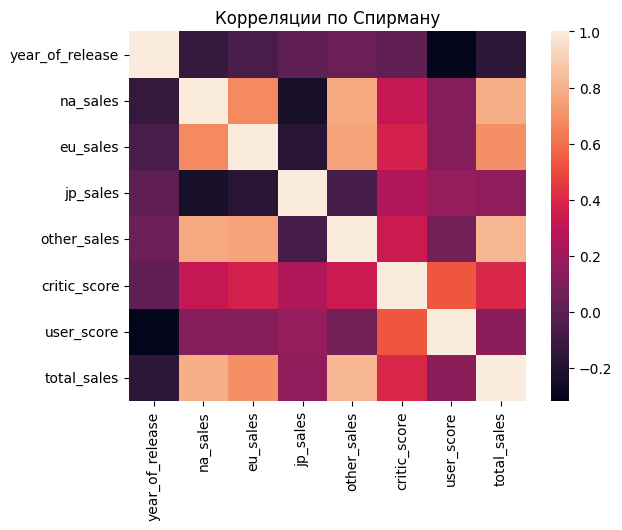

In [13]:
sns.heatmap(df.select_dtypes(np.number).corr(method='spearman')).set(title='Корреляции по Спирману')
plt.show()

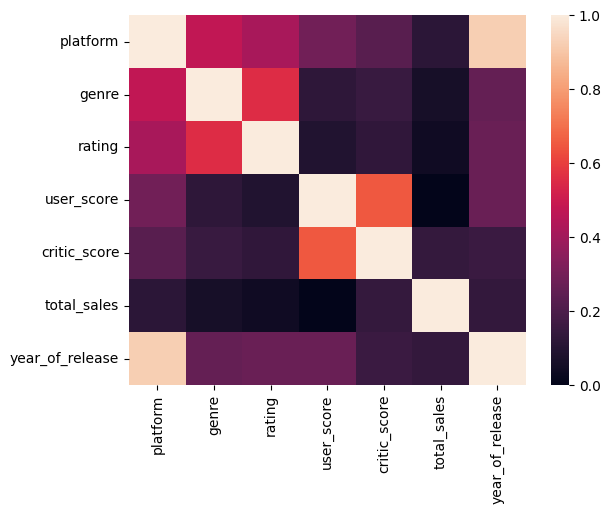

In [14]:
sns.heatmap(df[['platform', 'genre', 'rating', 'user_score', 'critic_score', 'total_sales', 'year_of_release']].phik_matrix(interval_cols=['user_score', 'critic_score','year_of_release','total_sales']));

Изучив матрицу корреляций, мы можем наблюдать некоторые интересные закономерности:

1) Платформа сильно зависит от года выпуска. Есть также некоторая зависимость между годом выпуска и жанром, рейтингом  ESRB и оценкой пользователя.

2) Есть зависимость между продажами и оценкой игры критиками. Пользовательский рейтинг также оказывает незначительное влияние на продажи

3) Явной зависимости между жанром или платформой и продажами на матрице корреляций мы не наблюдаем



### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [62]:
year_group2 = df.copy(deep=True)
year_group2 = year_group2.dropna(subset = ['year_of_release'])
year_group2['year_of_release'] = year_group2['year_of_release'].astype('int').astype('str')
year_group = year_group2.groupby('year_of_release').agg({'name':'nunique'}).reset_index().rename(columns = {'name':'number_of_games'})


In [63]:
fig = px.bar(year_group, x="year_of_release", y="number_of_games", title='Количество игр по годам')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Мы видим, что больше всего игр производилось в 2008 - 2009 годах. После 2009 года количество выпускаемых игр пошло на спад.

Дополнительно нам интересно посмотреть как менялись средние значения прибыли по годам

In [64]:
avg_profit_year = year_group2.groupby('year_of_release').agg({'total_sales':'mean'}).reset_index().rename(columns = {'total_sales':'avg_profit_games'})

In [65]:
fig = px.bar(avg_profit_year, x="year_of_release", y="avg_profit_games", title='Средняя выручка по годам с игры')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

Мы видим, что одна игра, выпущенная на одной из платформ в среднем приносила намного больше прибыли в 80-е и начале 90-х годов, чем в последние годы


Мы также видим, что в большинстве случаев в годы начиная с 1996 по 2012 одна игра приносила в среднем прибыль 0.47 - 0.6



Таким образом возникает вопрос, как долго игра может приносить прибыль? В случае, если бы популярная игра могла приносить стабильную прибыль на протяжении нескольких лет, мы бы увидели это на графике, и средняя выручка с игр, выпущенных, скажем, в 2008 - 2010 годах была бы существенно выше средней выручки с игр, выпущенных в 2015-2016 годах.



Мы можем только наблюдать заметное падение средней выручки в 2016 году, что может натолкнуть нас на предположение, что в среднем игра приносит прибыль примерно 2-3 года

### 2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [66]:
year_group_top = year_group2.groupby('platform').agg({'total_sales':'sum'}).reset_index().sort_values(by ='total_sales', ascending = False).head(10)

In [20]:
list1 = list(year_group_top['platform'])

In [21]:
pd.set_option('display.max_rows', None)

In [22]:
year_group1 = (
    year_group2.query('platform in @list1').groupby(['year_of_release','platform']).agg({'total_sales':'sum'}).reset_index().
rename(columns = {'total_sales':'sales_per_platform'})
)
year_group3 = year_group2.query('platform in @list1').groupby('year_of_release').agg({'total_sales':'sum'}).reset_index()
year_group4 = year_group1.merge(year_group3, on = 'year_of_release', how = 'left').sort_values(by = 'year_of_release')
year_group4['share'] = year_group4['sales_per_platform']/year_group4['total_sales']

In [24]:
year_group4['year_of_release'] = year_group4['year_of_release'].astype('int')

In [67]:
fig = px.bar(year_group4, x="year_of_release", y="sales_per_platform", color="platform", title='Продажи по платформам - топ 10')
fig.show()

Мы видим, как одни популярные платформы сменяют другие. Обычно в один период существуют не более 4 популярных платформ. Часто платформы сменяют друг друга каждые 5-7 лет. Но есть и долгожители. Так, платформа PS3 оставалась достаточно популярной на протяжении 8-9 лет.

In [26]:
fig = px.bar(year_group4, x="year_of_release", y="share", color="platform", title='Доля каждой платформы в продажах')
fig.show()

На графике мы видим, что в последнем году самую большую долю в продажах составляла платформа PS4. Платформа находится на стадии увеличения популярности, она существует на рынке 3-4 года. Можно сделать предположение, что и в следующем 2017 году она будет оставаться популярной.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

В дальнейшем мы будем анализировать данные начиная с 2014 года. Таким образом 2017 год попадет в середину периода из 7 лет, за который ообычно сменяются платформы и, вероятно, меняются и вкусовые предпочтения аудитории.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [27]:
top_platform_recent = (df.query('year_of_release >2013').
                       groupby('platform')
                       .agg({'total_sales':'sum'})
                       .reset_index().sort_values(by ='total_sales', ascending = False)
                       .head(5))
top_platform_recent


,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22


В таблице мы видим топ-5 платформ, лидирующих по продажам. С больши отрывом лидирует PS4

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [28]:
list3 = list(top_platform_recent['platform'])

In [29]:
data = df.query('(platform in @list3)&(year_of_release > 2013)').copy(deep = True).dropna(subset = ['year_of_release'])

In [30]:
fig = px.box(data, x = 'platform', y='total_sales')
fig.update_layout(yaxis_range= [0,6])
fig.show()

На графике самые лучшие результаты у платформ PS4 и XONe. Мы ранее наблюдали. что по суммарным продажам заметно лидирует PS4, однако, отдельная игра, выпущенная на XONe может продаваться не хуже

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

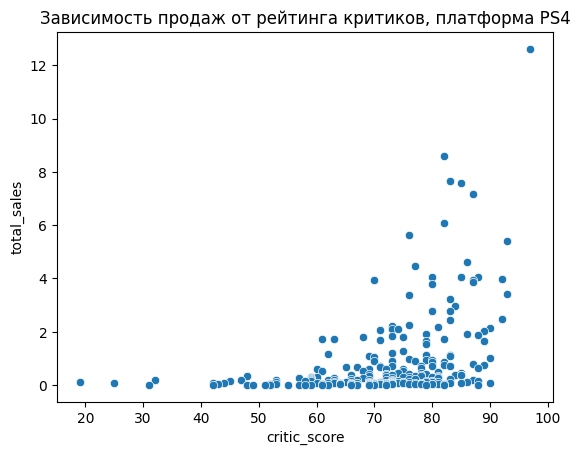

In [31]:
sns.scatterplot(data=data.query('platform == "PS4"'), x="critic_score", y="total_sales").set(title = 'Зависимость продаж от рейтинга критиков, платформа PS4')
plt.show()

Мы наблюдаем явную зависимость продаваемости игр от рейтинга критиков

Посмотрим, если ли общая зависимость продаж на всех платформах от рейтинга критиков

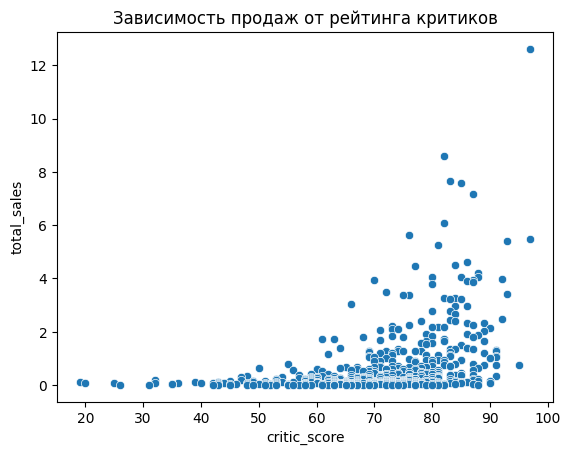

In [32]:
sns.scatterplot(data=data, x="critic_score", y="total_sales").set(title = 'Зависимость продаж от рейтинга критиков')
plt.show()

Мы также видим зависимость продаж от рейтинга критиков и на других платформах

Посмотрим, есть ли зависимость продаж от рейтинга пользователей

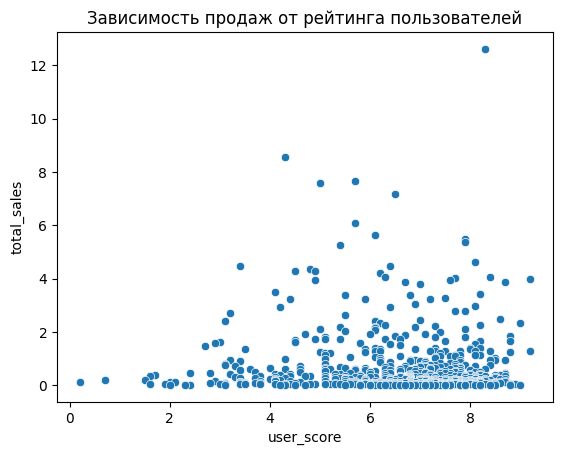

In [33]:
sns.scatterplot(data=data, x="user_score", y="total_sales").set(title = 'Зависимость продаж от рейтинга пользователей')
plt.show()

Зависимость не столь явная, но все жи мы видим большее количество продаж там, где рейтинг больше 6

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [34]:
fig = px.box(data, x = 'genre', y='total_sales')
fig.update_layout(yaxis_range= [0,3])
fig.update_layout(title = "Продажи игр по жанрам")
fig.show()

В последние годы с большим отрывом лидирует жанр Shooter. Второе и третье место по популярности разделили жанры Sports и Role-Playing

### Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [35]:
def top_5(data, col):
  df1 = data.groupby(col).agg({'na_sales':['sum','mean'], 'eu_sales':['sum', 'mean'], 'jp_sales':['sum', 'mean']}).reset_index()
  df1.columns = [col, 'sum_na_sales', 'mean_na_sales', 'sum_eu_sales', 'mean_eu_sales', 'sum_jp_sales', 'mean_jp_sales']
  na_sales_sum = list(df1.sort_values(by = 'sum_na_sales', ascending = False).head(5)[col])
  eu_sales_sum = list(df1.sort_values(by = 'sum_eu_sales', ascending = False).head(5)[col])
  jp_sales_sum = list(df1.sort_values(by = 'sum_eu_sales', ascending = False).head(5)[col])
  na_sales_mean = list(df1.sort_values(by = 'mean_na_sales', ascending = False).head(5)[col])
  eu_sales_mean = list(df1.sort_values(by = 'mean_eu_sales', ascending = False).head(5)[col])
  jp_sales_mean = list(df1.sort_values(by = 'mean_eu_sales', ascending = False).head(5)[col])
  list1 = list(set(na_sales_sum + eu_sales_sum + jp_sales_sum))
  list2 = list(set(na_sales_mean+ eu_sales_mean + jp_sales_mean))
  df_sum = df1[df1[col].isin(list1)]
  df_mean = df1[df1[col].isin(list2)]
  return df_sum, df_mean

Мы написали функцию, которая сначала подсчитывает суммарные и средние продажи в каждом из регионов. Мы можем группировать данные как по платформам, так и по жанрам. В результате мы формируем табличку df_sum, в которой отобраны только топовые по сумме продаж платформы в каждом из регионов. Аналогично мы можем формировать табличку с топовыми и средними показателями продаж для каждого региона по жанрам.

In [36]:
df_sum, df_mean = top_5(data, 'platform')
df_sum.sample()


,platform,sum_na_sales,mean_na_sales,sum_eu_sales,mean_eu_sales,sum_jp_sales,mean_jp_sales
3,X360,28.3,0.254955,15.49,0.13955,0.08,0.000721


In [37]:
df_mean.sample()

,platform,sum_na_sales,mean_na_sales,sum_eu_sales,mean_eu_sales,sum_jp_sales,mean_jp_sales
2,PS4,98.61,0.262261,130.04,0.345851,15.02,0.039947


In [38]:
def bar_cat(df, col, name, col1, col2, col3):
  fig = go.Figure()
  fig.add_trace(go.Bar(x = df[col], y = df[col1], name= col1))
  fig.add_trace(go.Bar(x = df[col], y = df[col2], name = col2))
  fig.add_trace(go.Bar(x = df[col], y = df[col3], name = col3))
  fig.update_layout(title= name, xaxis_tickangle=-45)
  fig.show()

In [39]:
bar_cat(df_sum, 'platform', "Суммарные продажи в разных регионах по платформам", 'sum_na_sales', 'sum_eu_sales', 'sum_jp_sales')

In [40]:
bar_cat(df_mean, 'platform', "Средние продажи в разных регионах по платформам", 'mean_na_sales', 'mean_eu_sales', 'mean_jp_sales')

В Европе и Америке самые популярные платформы - PS4 и XOne. ПРи этом, вероятно, больше игр выходит на PS4. Поэтому, именно эта платформа лидирует по сумме продаж. Однако, по средним показателям платформа XOne демонстрирует даже лучшие результаты в Америке, чем PS4

В Японии первое место как по суммарным продажам, так и по средним продажам на игру, занимает платформа 3DS

In [41]:
top_genre_sum, top_genre_mean = top_5(data, 'genre')

In [42]:
bar_cat(top_genre_sum, 'genre', "Суммарные продажи в разных регионах по жанрам", 'sum_na_sales', 'sum_eu_sales', 'sum_jp_sales')

In [43]:
bar_cat(top_genre_mean, 'genre', "Средние продажи в разных регионах по жанрам", 'mean_na_sales', 'mean_eu_sales', 'mean_jp_sales')

Жанр Shooter лидирует с большим отрывом как по суммарным, так и по средним значения продаж в Северной Америке и Европе. При этом жанр Action, занимающий второе место по продажам в Америке и первое в Европе, приносит значительно меньше прибыли в среднем на игру.

В Японии лучше всего продаются игры жанров Role_Playing. Этот жанр лидирует и по суммарным продажам и по средним показателям. Жанр Action, занимающий второе место по сумме продаж в Японии, демонстрирует заметно более низкие средние показатели продаж с игры.

In [44]:
fig = px.pie(df_sum, values='sum_na_sales', names = 'platform', title='Доли продаж по платформам в Северной Америке')
fig.show()

In [45]:
fig = px.pie(df_sum, values='sum_eu_sales', names = 'platform', title='Доли продаж по платформам в Европе')
fig.show()

In [46]:
fig = px.pie(df_sum, values='sum_jp_sales', names = 'platform', title='Доли продаж по платформам в Японии')
fig.show()

In [47]:
fig = px.pie(top_genre_sum, values='sum_na_sales', names = 'genre', title='Доли продаж по жанрам в Северной Америке')
fig.show()

In [48]:
fig = px.pie(top_genre_sum, values='sum_eu_sales', names = 'genre', title='Доли продаж по жанрам в Европе')
fig.show()

In [49]:
fig = px.pie(top_genre_sum, values='sum_jp_sales', names = 'genre', title='Доли продаж по жанрам в Японии')
fig.show()

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [50]:
fig = px.box(data, x = 'rating', y='na_sales')
fig.update_layout(yaxis_range= [0,3])
fig.update_layout(title = "Распределение по продажам в Северной Америке в зависимости от рейтинга ESRB")
fig.show()

In [51]:
fig = px.box(data, x = 'rating', y='eu_sales')
fig.update_layout(yaxis_range= [0,1.5])
fig.update_layout(title = "Влияние рейтинга ESRB на продажи в Европе")
fig.show()

In [68]:
fig = px.box(data, x = 'rating', y='jp_sales')
fig.update_layout(yaxis_range= [0,0.4])
fig.update_layout(title = "Влияние рейтинга ESRB на продажи в Японии")
fig.show()

Мы видим, что рейтинг ESRB влияет на продажи. Так, в Америке и Европе лучше продажются игры с рейтингом М (старше 17 лет), в Японии лучше продаются игры с рейтингом T (старше 13 лет)

### Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние значения пользовательского рейтинга платформ Xbox One и PC одинаковые

H1: Средние значения пользовательского рейтинга Xbox One и PC различно

In [53]:
df1 = df.query('year_of_release > 2013')

In [54]:
a = round(df1.query('platform == "PC"').dropna()['user_score'].mean(),2)
b = round(df1.query('platform == "XOne"').dropna()['user_score'].mean(),2)

In [55]:
print(f'Среднее значение пользовательских рейтингов платформы PC {a}')
print(f'Среднее значение пользовательских рейтингов платформы PC {b}')

Среднее значение пользовательских рейтингов платформы PC 6.28
Среднее значение пользовательских рейтингов платформы PC 6.57


In [56]:
alpha = 0.05 # уровень статистической значимости
sample_1 = df.query('platform == "PC"').dropna()['user_score']
sample_2 = df.query('platform == "XOne"').dropna()['user_score']
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 6.469147981752585e-06
Отвергаем нулевую гипотезу


НО Средние пользовательские рейтинги жанров Action  и Sports одинаковые

Н1 Средние пользовательские рейтинги жанров Action  и Sports разные



In [57]:
a1 = round(df1.query('genre == "Sports"').dropna()['user_score'].mean(),2)
b1 = round(df1.query('genre == "Action"').dropna()['user_score'].mean(),2)

In [58]:
print(f'Среднее значение пользовательских рейтингов жанра Sports {a1}')
print(f'Среднее значение пользовательских рейтингов жанра Avtion {b1}')

Среднее значение пользовательских рейтингов жанра Sports 5.68
Среднее значение пользовательских рейтингов жанра Avtion 6.81


In [59]:
alpha = 0.05 # уровень статистической значимости
sample_1 = df.query('genre == "Sports"').dropna()['user_score']
sample_2 = df.query('genre == "Action"').dropna()['user_score']
results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.7980492910095923
Не получилось отвергнуть нулевую гипотезу


## Выводы

Мы исследовали данные о продажах игр с 1980х годов до 2016 года. Наша задача — отобрать наиболее важные признаки, которые смогут обеспечить успешные продажи новой игры, выпущенной в 2017 году.

Итак, мы видим, что обычно игровые платформы сохраняют популярность на протяжении 6-7 лет. Вероятно, за этот период происходит и смена интересов пользователей к жанру игр. Мы детально изучили данные за последние 3 года. Мы предполагаем, что это поможет нам сделать ставку на наиболее популярные платформы и жанры.


**Итак, выбор платформы.**

В Европе и Америке самые популярные платформы в последние 3 года - PS4 и XOne. При этом,  PS4 лидирует по сумме продаж. Однако, по средним показателям платформа XOne демонстрирует даже лучшие результаты в Америке, чем PS4. Таким образом мы рекомендуем выбрать платформу  PS4 или XOne для продаж в Америке и Европе.
В Японии первое место как по суммарным продажам, так и по средним продажам на игру, занимает платформа 3DS. Именно эту платформу мы рекомендуем использовать для игр в 2017 году в Японии.


**Переходим к выбору популярных жанров.**

Жанр Shooter лидирует с большим отрывом как по суммарным, так и по средним значения продаж в Северной Америке и Европе. При этом жанр Action, занимающий второе место по продажам в Америке и первое в Европе, приносит значительно меньше прибыли в среднем на игру. Таким образом, мы бы рекомендовали выбрать жанр Shoter для новой игры в Америке или Европе. На втором месте мы бы советовали выбрать жанр Sports.

В Японии лучше всего продаются игры жанров Role_Playing. Этот жанр лидирует и по суммарным продажам и по средним показателям. Жанр Action, занимающий второе место по сумме продаж в Японии, демонстрирует заметно более низкие средние показатели продаж с игры. Таким образом, в Японии делаем ставку на жанр  Role_Playing.



 **Влияние рейтинга  ESRB**

Мы видим, что рейтинг ESRB влияет на продажи. Так, в Америке и Европе лучше продаются игры с рейтингом М (старше 17 лет), в Японии лучше продаются игры с рейтингом T (старше 13 лет)


**Рейтинги пользователей и критиков**

Мы наблюдаем явную зависимость продуваемости игр от рейтинга критиков. Мы также наблюдаем незначительное влияние пользовательских оценок на продажи. Таким образом, при запуске новой игры важно уделить внимание отзывам и рейтингам критиков и пользователей.